
## Data, URLs

### Weather Data
[Met Eireann Historical Data](https://www.met.ie/climate/available-data/historical-data)


### Athenry  
[Hourly wind data since 2010](https://cli.fusio.net/cli/climate_data/webdata/hly1875.zip)
[Daily ](https://cli.fusio.net/cli/climate_data/webdata/dly1875.zip)


### Units
All wind speed and highes gust units are in knots (kt).  A knot is one nautical mile per hour, or about 1.15 statute miles per hour or 1.852 km/h.

### Wind Speed
from [Google's Generative AI](https://www.google.com)
Large-scale wind turbines typically start turning at wind speeds of 7–9 miles per hour and reach their maximum output at around 27 miles per hour. They begin to reduce power or disconnect at wind speeds above 25 miles per hour. At these high speeds, the turbine's braking system activates to prevent damage to the blades. 
Efficiency
Wind turbines are most efficient at around 18 miles per hour. 
The consistency of the wind is more important than the speed for producing the most wind power. 

[Ireland](https://enerpower.ie/portfolio-item/wind-turbine-faq-ireland/)
Wind turbines typically start operating at wind speeds around Beaufort Force 3, or around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). Turbines reach maximum power output at Beaufort 5 (around 11-14 m/s or 25-30 mph).  1609.3m in a mile

| Wind Speed m/s | Wind Speed mi/h | What Happens |  
|----------------|-----------------|--------------|  
| ≤ 3-5  | ≤ 8-12  | Wind turbines start operating  |  
| 11–14  |  25-30  | Wind turbines reach maximum power output  |   
| ≥ 24   | ≥ 55    | Wind turbines shut down to prevent damage  |   

To take a specific example, the [Siemens SWT-3.0-101 3MW turbine](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php) is use in the [Galway Wind Park](https://www.sserenewables.com/onshore-wind/ireland/galway-wind-park/), located in the Cloosh Valley south-west of Oughterard in Co. Galway. 58 of these are deployed for a total yield of 174MW. This was the largest wind park in the country until it was overtaken by the second phase of the 192MW [Oweninny Wind Farm](https://www.oweninnywindfarm.ie/the-wind-farm/), which uses 29 3.2MW Siemens SWT-3.2-113 turbines with an installed capacity of 93MW and 31 Nordex N117/3600 wind turbines with an installed capacity of 99MW.

In [260]:
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [261]:
# The following 
#rating = np.array([['0', 0],['0.5', 0],['1', 0],['1.5', 0],['2', 0],['2.5', 0],['3', 0],['3.5', 50],['4', 113],['4.5', 183],['5', 253],['5.5', 342],['6', 430],['6.5', 569],['7', 707],['7.5', 891],['8', 1075],['8.5', 1306],['9', 1537],['9.5', 1796],['10', 2054],['10.5', 2302],['11', 2549],['11.5', 2750],['12', 2876],['12.5', 2950],['13', 2982],['13.5', 2995],['14', 2998],['14.5', 3000],['15', 3000],['15.5', 3000],['16', 3000],['16.5', 3000],['17', 3000],['17.5', 3000],['18', 3000],['18.5', 3000],['19', 3000],['19.5', 3000],['20', 3000],['20.5', 3000],['21', 3000],['21.5', 3000],['22', 3000],['22.5', 3000],['23', 3000],['23.5', 3000],['24', 3000],['24.5', 3000],['25', 3000],['25.5', 0],['26', 0]])
#ratingp = pd.DataFrame(data = rating, columns = ["windspeed", "power"])
#rating = rating.astype('float')
#ratingp = pd.DataFrame(data = rating, columns = ["windspeed", "power"])


(0.0, 27.0)

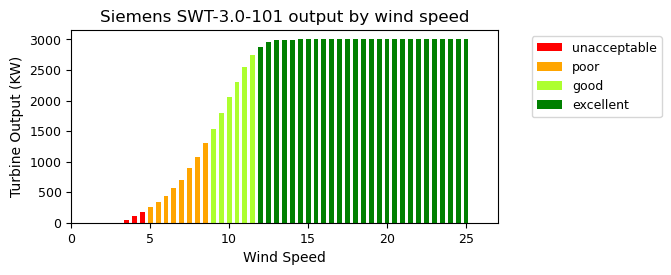

In [455]:
# Read in and plot the power output vs wind speed data
ratingp = pd.read_csv("./data/poweroutput.txt",sep=",", header=None, names=["windspeed", "power"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5,2.5))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
output = ['unacceptable','poor','good','excellent']
colours = ['red', 'orange', 'greenyellow', 'green']
#colourmap = {'unacceptable':colours[0], 'poor':colours[1], 'good':colours[2], 'excellent':colours[3]}
colourmap = {'unacceptable':'red', 'poor':'orange', 'good':'greenyellow', 'excellent':'green'}

axes.bar(ratingp.windspeed[0:10], ratingp.power[0:10], color=colours[0],width=0.31)
axes.bar(ratingp.windspeed[10:18], ratingp.power[10:18], color=colours[1],width=0.31)
axes.bar(ratingp.windspeed[18:24], ratingp.power[18:24], color=colours[2],width=0.31)
axes.bar(ratingp.windspeed[24:52], ratingp.power[24:52], color=colours[3],width=0.31)
axes.bar(ratingp.windspeed[52:54], ratingp.power[52:54], color=colours[0],width=0.31)
axes.set_title('Siemens SWT-3.0-101 output by wind speed', fontsize=12)
axes.set_xlabel('Wind Speed', fontsize=10)
axes.set_ylabel('Turbine Output (KW)', fontsize=10)
axes.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right',labels=output, fontsize=9)
plt.xlim([0, max(ratingp.windspeed)+1.0])


## Analysis - Weather Data
While there are 31 weather stations in Galwy making daily weather available for [download](https://www.met.ie/climate/available-data/historical-data), most focus on precipitation and only 2 provide wind speed - Athenry and Mace Head. The study will focus on data from Athenry weather station.

According to the information in the header of the downloaded csv file, the fields we are interested in are:  
  
date:  -  00 to 00 utc  
wdsp:  -  Mean Wind Speed (kt)  
hm:    -  Highest ten minute mean wind speed (kt)                 
hg:    -  Highest Gust (kt)  

'kt' is the abbreviation for knot, or nautical miles per hour.  They convert as follows.  
  
| unit | knots | miles per hour |  kilometres per hour |  metres per second |  
|----------------|-----------------|--------------|--------------|--------------|  
| speed  | 1.0  | 1.151  |  1.852  | 0.514  |  

In [442]:
# Create a dataframe called 'weather' with the fields we are interested in.
weather = pd.read_csv("data/dly1875.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
weather.dtypes

date    object
wdsp    object
hm       int64
hg       int64
dtype: object

In [ ]:
# Review the first few rows
weather.head(3)

,date,wdsp,hm,hg,category
0,26-feb-2010,8.3,14,20,
1,27-feb-2010,4.3,9,14,good
2,28-feb-2010,4.9,17,24,


Windspeed was created as an object, because some cells countain a white space where wind data was not available on the day.
To convert to a numeric column, we need to replace the white space with a value that will be recognized as a number.

In [443]:
#for row in weather.itertuples():
    #if row.wdsp == ' ':
    #    print('found blank ', row)

weather['wdsp'] = weather['wdsp'].replace(' ',-999)
weather['wdsp'] = weather['wdsp'].astype(float)
weather['wdsp'] = weather['wdsp'].replace(-999,np.nan)
weather.dtypes


date     object
wdsp    float64
hm        int64
hg        int64
dtype: object

Text(0.5, 0, 'Date')

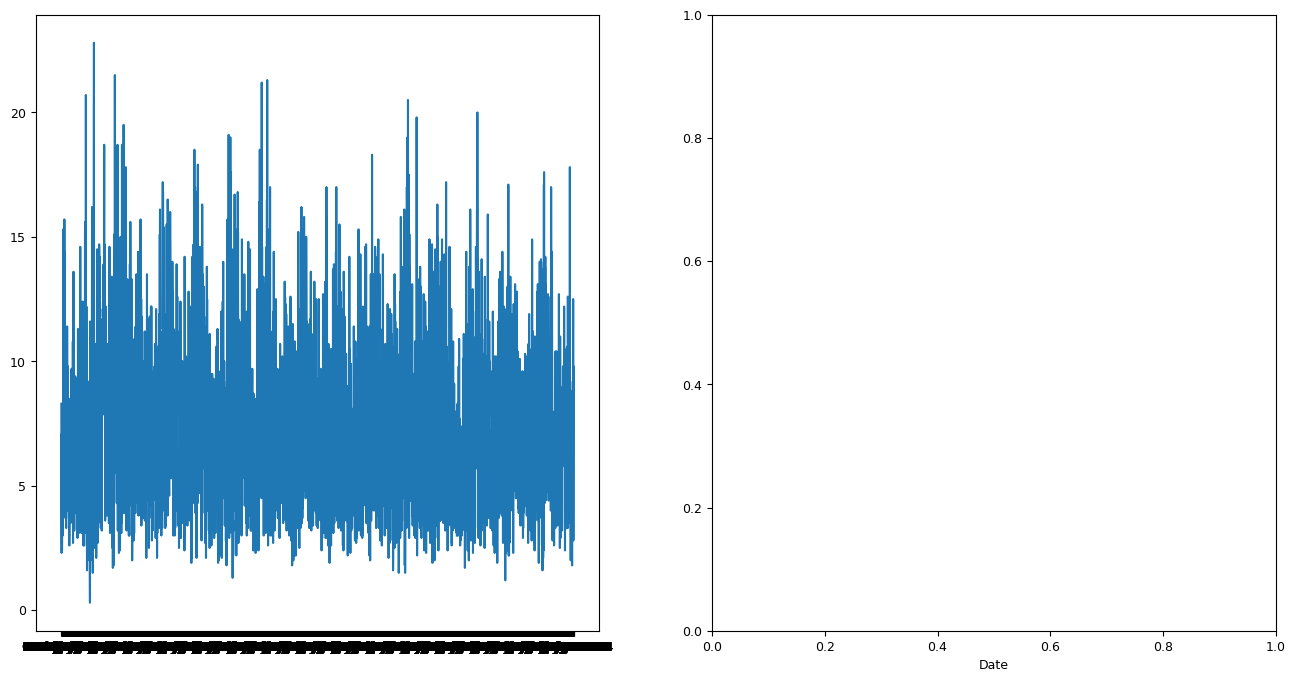

In [444]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(weather["date"], weather["wdsp"])
plt.xlabel('Date')
#ax1.plot(mean_daily_temp)
#ax1.plot(mean_monthly_temp)
#ax1.set_title('Full Dataset', fontsize=14)

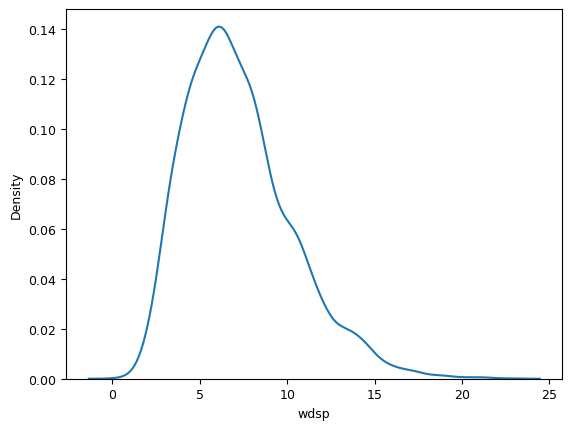

In [445]:
sns.kdeplot(weather["wdsp"])
#weatherx = [0,4,8,11,25]
#weathery = [0.2, 0.2, 0.2, 0.2, 0.2]
#z = ['unacceptable','poor','good','excellent','unacceptable2']
#sns.barplot(x=weatherx, y=weathery, hue=z)
plt.show()


In [447]:
weather['category']=''
x=1
weather.loc[x, 'category'] = "good"
weather.head(5)

,date,wdsp,hm,hg,category
0,26-feb-2010,8.3,14,20,
1,27-feb-2010,4.3,9,14,good
2,28-feb-2010,4.9,17,24,
3,01-mar-2010,2.3,6,8,
4,02-mar-2010,7.1,12,19,


We will now add a column to the weather dataframe to categorize the windspeed as defined above, i,e,

In [449]:
# create a new column
weather['category']=''

# we already defined output as ['unacceptable','poor','good','excellent']
count=0
for row in weather.itertuples():
    print (row.wdsp, end = ' ')
    if row.wdsp <= 4.0:
        weather.loc[count, 'category'] = output[0]
    elif row.wdsp > 4.0 and row.wdsp <=8.0:
        weather.loc[count, 'category'] = output[1]
    elif row.wdsp > 8.0 and row.wdsp <=11.0:
        weather.loc[count, 'category'] = output[2]
    elif row.wdsp > 11.0 and row.wdsp <=25.0:
        weather.loc[count, 'category'] = output[3]
    else:
        weather.loc[count, 'category'] = output[0]
    count += 1

8.3 4.3 4.9 2.3 7.1 5.4 4.7 2.4 2.8 6.5 6.2 4.3 3.6 3.0 6.5 4.4 4.2 4.1 9.4 9.7 15.3 5.8 5.8 7.3 10.9 9.5 6.5 8.2 3.9 7.4 3.9 11.3 15.7 12.2 5.2 7.2 8.2 8.3 14.4 5.4 7.2 5.6 6.1 5.6 3.7 4.9 5.0 6.4 6.6 4.0 3.5 3.3 5.3 4.2 4.8 4.2 5.6 6.3 8.0 5.0 9.9 11.4 8.0 6.6 4.0 9.2 7.8 6.0 7.3 9.8 8.2 7.8 6.1 8.3 5.2 5.1 7.0 7.9 8.5 5.5 3.7 6.7 5.4 4.2 2.6 3.7 4.3 5.9 6.5 7.0 5.2 4.1 6.3 3.5 6.3 7.5 3.5 8.1 6.8 4.7 5.7 7.7 7.6 8.7 7.8 7.6 6.4 9.7 8.0 5.1 4.2 4.6 6.9 7.7 4.9 5.8 5.3 7.6 5.8 4.5 7.1 10.8 5.5 2.7 8.4 10.6 11.4 9.8 13.6 7.7 9.9 13.0 6.6 4.5 7.5 5.8 3.2 7.2 5.9 7.0 9.0 8.9 5.9 7.3 4.3 9.0 9.4 4.3 7.1 7.9 9.2 7.9 6.5 3.9 7.4 8.2 4.3 4.4 6.6 9.1 7.0 9.3 7.3 5.0 8.0 7.6 6.2 8.7 7.5 3.1 2.9 4.9 7.0 8.4 6.3 11.3 8.1 5.8 9.1 8.8 4.8 5.4 5.3 8.0 8.0 3.1 5.1 5.9 6.6 7.4 5.4 7.9 4.7 6.1 7.6 7.0 6.7 6.5 6.9 14.6 11.5 10.6 5.1 4.2 8.2 8.5 8.0 8.1 5.8 10.1 7.5 3.1 4.0 7.3 4.6 4.3 6.4 10.6 7.5 6.0 10.0 10.1 7.8 11.0 11.3 12.4 7.6 5.3 3.2 2.8 2.7 5.7 2.6 5.3 7.7 6.9 3.8 4.8 6.1 5.4 2.6 8.3 11.9 9.6 

In [450]:
summary = weather['category'].value_counts()
print(summary.index)

Index(['poor', 'good', 'unacceptable', 'excellent'], dtype='object', name='category')


In [451]:
print(weather.iloc[4215])

date         11-sep-2021
wdsp                 NaN
hm                     6
hg                     8
category    unacceptable
Name: 4215, dtype: object


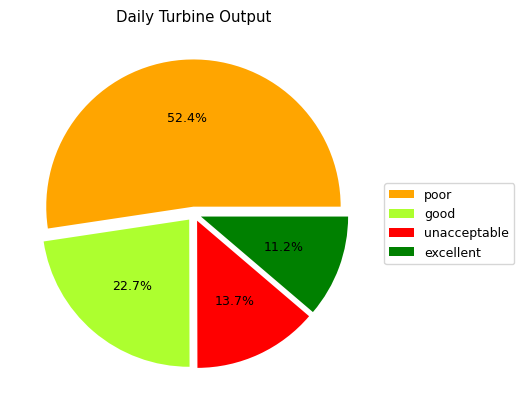

In [456]:
exp=[0.05, 0.05, 0.05, 0.05]

summary.plot.pie(ylabel='',labels=None,title='Daily Turbine Output',autopct='%1.1f%%', colors=[colourmap[key] for key in summary.index], explode=exp)
#summary.plot.pie(ylabel='',labels=None,title='Daily Turbine Output',autopct='%1.1f%%', explode=exp)

# Add a legend instead of the labels (positioned outside the pie chart)
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=summary.index)
plt.subplots_adjust(right=0.7)

## References
g1. https://en.wikipedia.org/wiki/Galway_Wind_Park